# Assignment 18: Neural Networks

## Dataset: Alphabet Recognition

**Topics Covered:**
- Multi-Layer Perceptron (MLP)
- Activation Functions
- Training Neural Networks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data
df = pd.read_csv('datasets/Alphabets_data.csv')
print("Dataset loaded! Shape:", df.shape)
df.head()

Dataset loaded! Shape: (5200, 17)


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,letter
0,6.72,8.09,7.87,10.34,2.07,2.12,0.28,4.45,1.92,1.16,12.23,4.06,11.58,1.65,6.28,8.90,A
1,12.13,2.95,14.73,4.62,14.84,5.61,14.16,0.36,0.11,6.99,13.56,6.90,5.32,11.16,0.44,4.44,A
2,2.11,13.33,11.09,11.65,2.89,12.43,8.85,12.92,5.22,4.50,9.91,12.85,4.75,9.29,6.14,3.38,A
3,2.41,4.32,2.34,13.21,9.25,10.52,14.84,13.09,11.50,14.15,12.96,6.19,12.82,9.68,8.38,7.29,A
4,12.94,11.68,7.74,3.07,3.45,8.87,11.11,3.09,12.21,10.44,1.36,4.56,11.48,11.29,9.24,0.28,A


In [2]:
# Prepare data
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encode target if categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Training:", len(X_train), "Testing:", len(X_test))

Training: 4160 Testing: 1040


In [3]:
# Train MLP Classifier
print("=== Training Neural Network ===")

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # 3 hidden layers
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train, y_train)
print("Training complete!")
print("Number of iterations:", mlp.n_iter_)

=== Training Neural Network ===
Training complete!
Number of iterations: 500


c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
# Evaluate
y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("=== Model Evaluation ===")
print("Accuracy:", round(accuracy, 4))

=== Model Evaluation ===
Accuracy: 0.0423


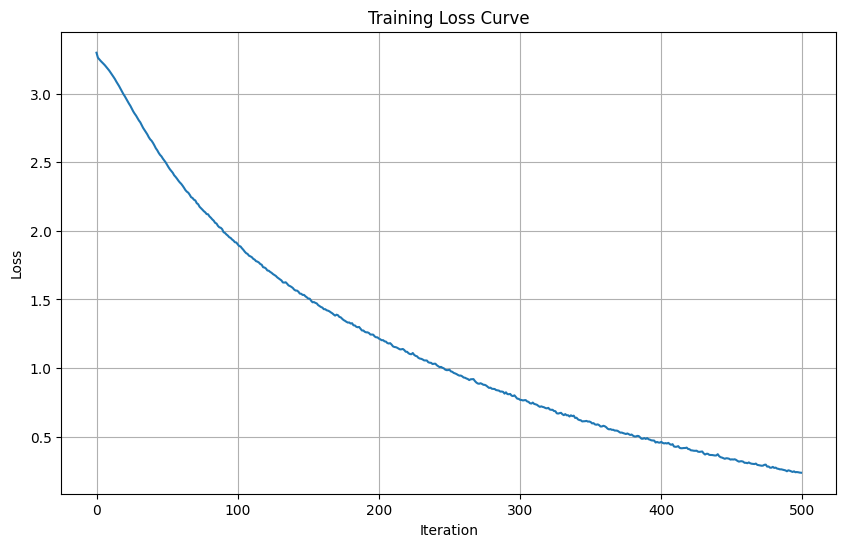

In [5]:
# Loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

In [6]:
# Compare different architectures
print("=== Comparing Architectures ===")

architectures = [
    (50,),
    (100,),
    (100, 50),
    (128, 64, 32)
]

for arch in architectures:
    mlp_temp = MLPClassifier(hidden_layer_sizes=arch, max_iter=300, random_state=42)
    mlp_temp.fit(X_train, y_train)
    acc = accuracy_score(y_test, mlp_temp.predict(X_test))
    print(str(arch) + ":", round(acc, 4))

=== Comparing Architectures ===


c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


(50,): 0.0356


c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


(100,): 0.0337


c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


(100, 50): 0.0298
(128, 64, 32): 0.0327


c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## ANN with Sequential Model

c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


=== Building ANN with Sequential Model ===
Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0391 - loss: 3.2769 - val_accuracy: 0.0385 - val_loss: 3.2643
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0472 - loss: 3.2544 - val_accuracy: 0.0445 - val_loss: 3.2669
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0484 - loss: 3.2518 - val_accuracy: 0.0373 - val_loss: 3.2703
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0529 - loss: 3.2433 - val_accuracy: 0.0469 - val_loss: 3.2758
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0541 - loss: 3.2363 - val_accuracy: 0.0469 - val_loss: 3.2771
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0637 - loss: 3.2280 - val_accuracy: 0.0409 - val_loss: 3.2851
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0742 - loss: 3.2147 - val_accuracy: 0.0433 - val_loss: 3.2927
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step -

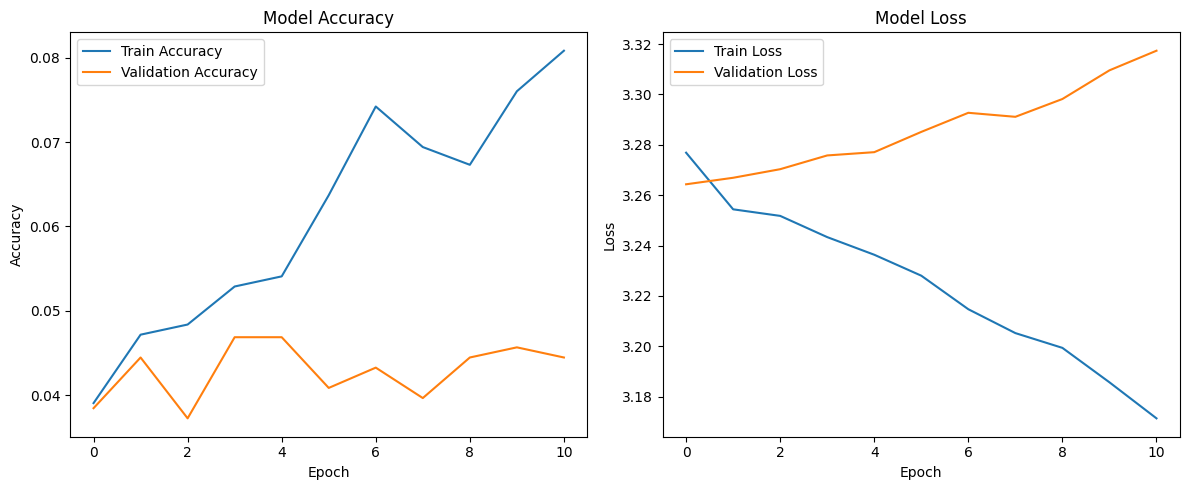

In [7]:
# ANN with Sequential Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

print("=== Building ANN with Sequential Model ===")

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax') # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("\nSequential Model Accuracy:", round(accuracy, 4))

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Hyperparameter Tuning with Keras Tuner

In [8]:
# Hyperparameter Tuning with Keras Tuner
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_input', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
            activation='relu'
        ))
    
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Instantiate the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='keras_tuner_dir',
    project_name='alphabet_recognition'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=20, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
print("\nBest model summary:")
best_model.summary()

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test)
print("\nTuned Model Accuracy:", round(accuracy, 4))

Trial 5 Complete [00h 00m 17s]
val_accuracy: 0.05528846010565758

Best val_accuracy So Far: 0.05528846010565758
Total elapsed time: 00h 01m 00s

Best model summary:


c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 416)            │       213,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 320)            │       133,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         8,346 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,898 (1.39 MB)

 Trainable params: 363,898 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0375 - loss: 3.3779

Tuned Model Accuracy: 0.0375


## Summary

- Built MLP classifier for alphabet recognition
- Compared different network architectures
- Deep networks can learn complex patterns